## <u>План проекта</u>

**Обзор данных:**
* Импорт необходимых библиотек;
* Чтение файла и сохранение полученных данных в переменные;
* Получение общей информации (head, info);

**Подготовка данных:**
* Корректировка типов данных (при необходимости);
* Заполнение пропусков;
* Удаление неинформативных значений;
* Добавление данных.

**Исследование данных:**
* Определение роста игр;
* Определение топ-5 платформ;
* Выручка по топ-5 платформ по годам;
* Оценка влияния на продажи критиков и пользователей;
* Определение популярных жанров;
* Портрет пользователя по регионам.

**Проверка гипотез:**
*	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
*	Средние пользовательские рейтинги жанров Action  и Sports разные.

**Выводы исследования:**
* Исследование и анализ данных;
* Работа с гипотезами.

### Обзор даннных

Импортируем библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

Прочитаем файл и построим графики:

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


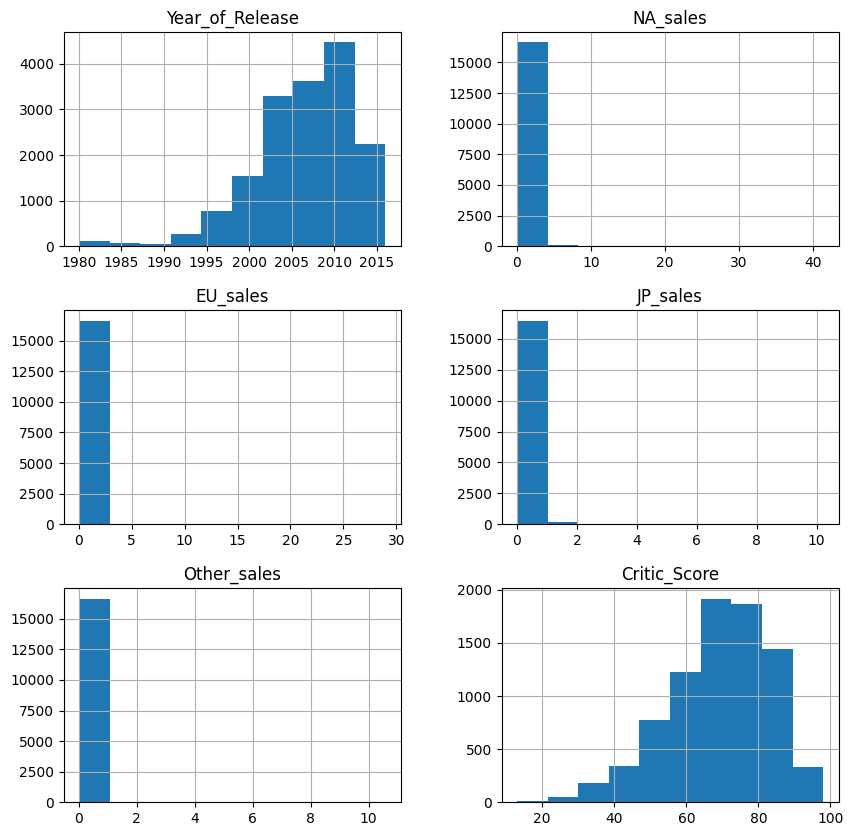

In [2]:
data = pd.read_csv('/content/games.csv')
display(data.head(10))
data.info()

data.hist(figsize=(10, 10));

Первичнный обзор данных говорит о том, что:
    
- больше всего игр выпускалось с 2009 по 2012г;
- продажи в Северной Америке не превышали 4млн копий, в Европе - не более 3млн, 1 млн - в Японии и других странах;
- самая частая оценка критиков 70.
    


### Подготовка данных

Заполним пустые значения:

In [3]:
data['Name'] = data['Name'].fillna('unknow')
data['Genre'] = data['Genre'].fillna('unknow')
data['Rating'] = data['Rating'].fillna('unknow')

Удалим неинформативные данные:

In [4]:
data1 = data.dropna(how ='any')
data1 = data1.query('User_Score != "tbd"')
display(data1.head())
data1.isna().sum()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E


Name               0
Platform           0
Year_of_Release    0
Genre              0
NA_sales           0
EU_sales           0
JP_sales           0
Other_sales        0
Critic_Score       0
User_Score         0
Rating             0
dtype: int64

Изменим тип данных:

In [5]:
data1['Year_of_Release'] = data1['Year_of_Release'].astype(int)
data1['Critic_Score'] = data1['Critic_Score'].astype(float)
data1['User_Score'] = data1['User_Score'].astype(float)

display(data1.head())
data1.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6894 entries, 0 to 16705
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6894 non-null   object 
 1   Platform         6894 non-null   object 
 2   Year_of_Release  6894 non-null   int64  
 3   Genre            6894 non-null   object 
 4   NA_sales         6894 non-null   float64
 5   EU_sales         6894 non-null   float64
 6   JP_sales         6894 non-null   float64
 7   Other_sales      6894 non-null   float64
 8   Critic_Score     6894 non-null   float64
 9   User_Score       6894 non-null   float64
 10  Rating           6894 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 646.3+ KB


<div class="alert alert-info">

*Заполнение пропусков:*
1. Name — название игры - неоткуда узнать, потому 'unknow'
2. Year_of_Release — год выпуска игры - выкинула 269 строк из датасета, 1% от общего количества, не критично. Данные о годе важны, участвуют во многих сводах и графиках.
3. Genre — жанр игры - неоткуда узнать, потому 'unknow'
4. Critic_Score — оценка критиков - неоткуда узнать, выкинула более 8000 строк.
5. User_Score — оценка пользователей (максимум 10) tbd - в оценке игроков неопределенная оценка. По смыслу приравниваю к NaN. Оставляю значения без изменений.
6. Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. - неоткуда узнать, потому 'unknow'


*Причины пропусков:*
1. Человеческий фактор. Не заполнили по ошибке или незнанию. Например, жанр могут знать не все. И с оценкой тоже могут сомневаться. Как видно из датафрейма сомневающихся много - 6701+2424tbd.
2. Неверный перенос, хранение, выгрузка данных.


*Изменение данных:*
- для года выпуска игры - он не может быть дробным
- оценка критиков и пользователей изменила на числовой вместо объекта, чтобы можно было считать.

    </div>

Приведём названия столбцов к нижнему регистру:

In [6]:
data1.columns = data1.columns.str.lower()


Добавим данные об общей сумме продаж:


In [7]:
data1['total_sales'] = data1[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
display(data1.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


### Исследование данных

Посмотрим, сколько игр выпускалось в разные годы:

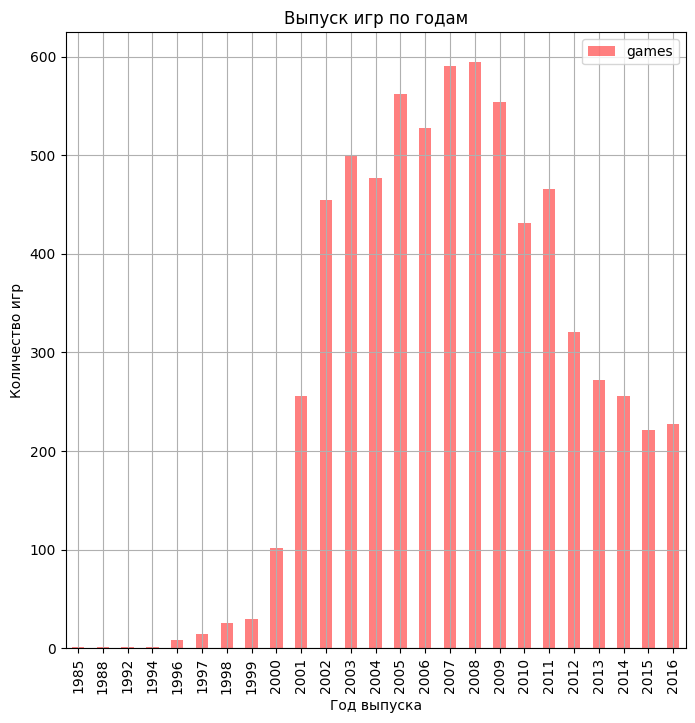

In [8]:
game_years = data1.groupby('year_of_release').agg(games = ('year_of_release', 'count'))
game_years.plot(grid=True, kind = 'bar', color = 'red', alpha = 0.5, figsize=(8, 8))
plt.title('Выпуск игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

<div class="alert alert-info">Важны данные с начала роста количества игр в год, так как там и прибиль увеличивается. То есть данные до 1995г можно отбросить.
На графике ясно видно, что пик производства игр был 2007-2009г, потом пошел на спад.</div>

Изучим продажи по платформам:

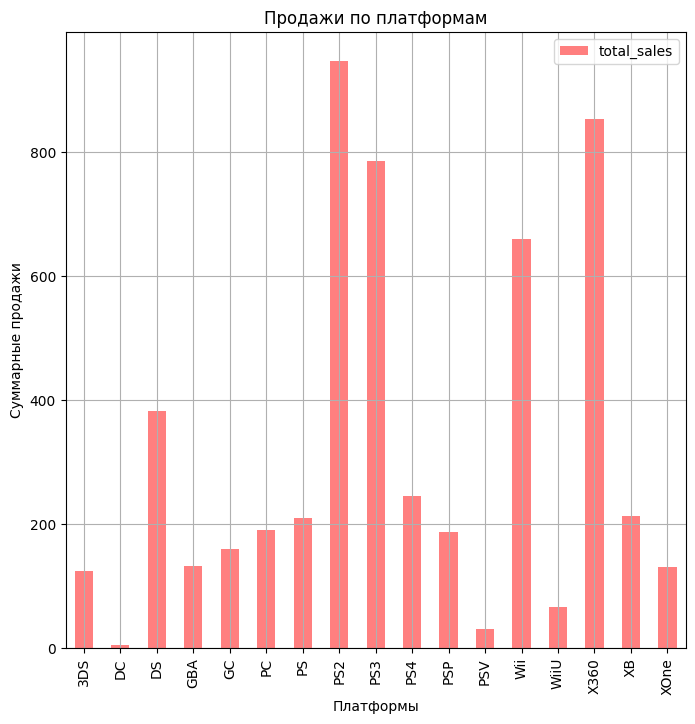

In [9]:
data_sale=data1.pivot_table(index='platform', values='total_sales', aggfunc = 'sum')
data_sale.plot(grid=True, kind='bar', color = 'red', alpha = 0.5, figsize=(8, 8))
plt.title('Продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи')
plt.show()

Выберем платформы с наибольшими суммарными продажами и постройте распределение по годам:

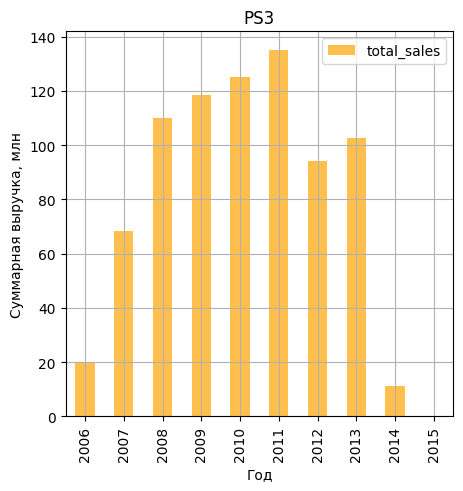

,total_sales
year_of_release,
2006,19.62
2007,68.52
2008,110.01
2009,118.50
2010,125.25
2011,135.18
2012,94.30
2013,102.70
2014,11.34


In [10]:
data1.query('platform == "PS3"').pivot_table(index='year_of_release', values='total_sales', aggfunc = 'sum').plot(grid=True, kind='bar', color = 'orange', alpha = 0.7, figsize=(5, 5))
plt.title('PS3')
plt.xlabel('Год')
plt.ylabel('Суммарная выручка, млн')
plt.show()

PS3 = data1.query('platform == "PS3"').pivot_table(index='year_of_release', values='total_sales', aggfunc = 'sum')
display(PS3)

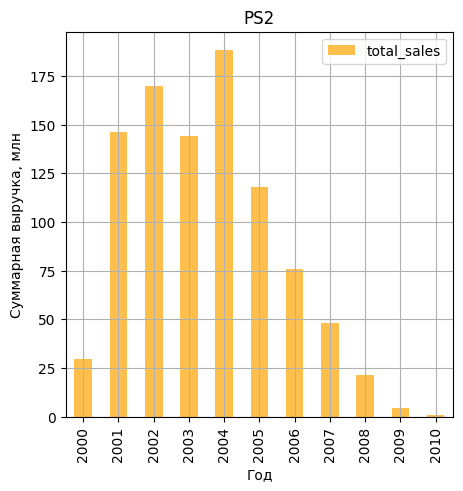

,total_sales
year_of_release,
2000,29.50
2001,145.96
2002,169.99
2003,144.27
2004,188.34
2005,117.70
2006,75.98
2007,48.08
2008,21.15


In [11]:
PS2 = data1.query('platform == "PS2"').pivot_table(index='year_of_release', values='total_sales', aggfunc = 'sum').plot(grid=True, kind='bar', color = 'orange', alpha = 0.7, figsize=(5, 5))
plt.title('PS2')
plt.xlabel('Год')
plt.ylabel('Суммарная выручка, млн')
plt.show()

PS2 = data1.query('platform == "PS2"').pivot_table(index='year_of_release', values='total_sales', aggfunc = 'sum')
display(PS2)

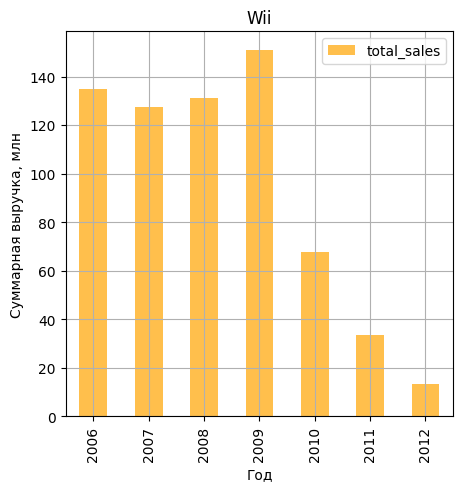

,total_sales
year_of_release,
2006,135.02
2007,127.31
2008,130.99
2009,151.01
2010,67.92
2011,33.75
2012,13.23


In [12]:
data1.query('platform == "Wii"').pivot_table(index='year_of_release', values='total_sales', aggfunc = 'sum').plot(grid=True, kind ='bar', color = 'orange', alpha = 0.7, figsize=(5, 5))
plt.title('Wii')
plt.xlabel('Год')
plt.ylabel('Суммарная выручка, млн')
plt.show()

Wii = data1.query('platform == "Wii"').pivot_table(index='year_of_release', values='total_sales', aggfunc = 'sum')
display(Wii)

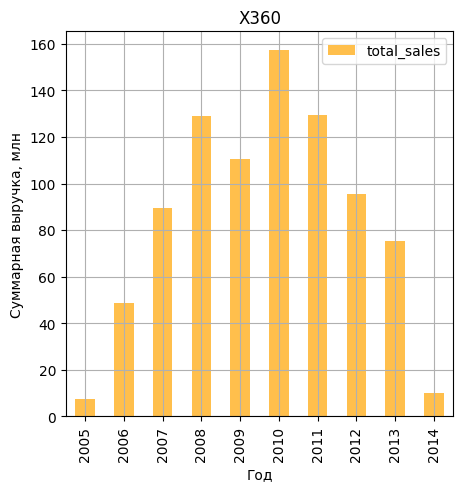

,total_sales
year_of_release,
2005,7.64
2006,48.92
2007,89.39
2008,129.16
2009,110.67
2010,157.41
2011,129.53
2012,95.68
2013,75.17


In [13]:
data1.query('platform == "X360"').pivot_table(index='year_of_release', values='total_sales', aggfunc = 'sum').plot(grid=True, kind ='bar', color = 'orange', alpha = 0.7, figsize=(5, 5))
plt.title('X360')
plt.xlabel('Год')
plt.ylabel('Суммарная выручка, млн')
plt.show()

X360 = data1.query('platform == "X360"').pivot_table(index='year_of_release', values='total_sales', aggfunc = 'sum')
display(X360)

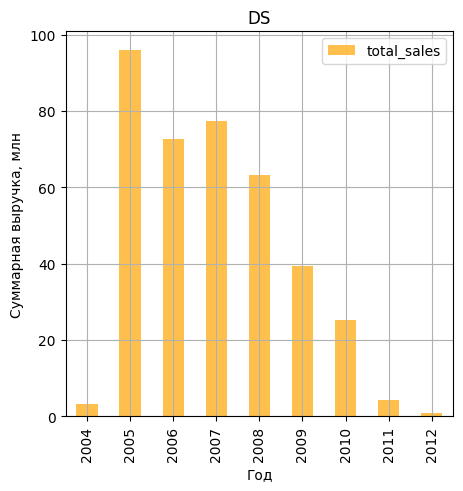

,total_sales
year_of_release,
2004,3.38
2005,96.03
2006,72.56
2007,77.47
2008,63.35
2009,39.42
2010,25.29
2011,4.36
2012,1.02


In [14]:
data1.query('platform == "DS"').pivot_table(index='year_of_release', values='total_sales', aggfunc = 'sum').plot(grid=True, kind ='bar', color = 'orange', alpha = 0.7, figsize=(5, 5))
plt.title('DS')
plt.xlabel('Год')
plt.ylabel('Суммарная выручка, млн')
plt.show()

DS = data1.query('platform == "DS"').pivot_table(index='year_of_release', values='total_sales', aggfunc = 'sum')
display(DS)

<div class="alert alert-info">
    
*Платформы с наибольшими суммарными продажами:*
1. PS3.
2. PS3.
3. Wii.
4. X360.
5. DS.

Цикл жизни крупной платформы составляет 7 лет. Пик продаж приходится на 4й год.
К 2016г. их у всех топов спад. Для постороения плана на 2017г. они не подходят.</div>

 Оставим в датафрейме инфо по актуальным периодам 2014-2016: для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года.

In [15]:
data2014_2016 = data1.query('year_of_release <= 2016 and year_of_release >= 2014')



Выявим общую сумму продаж на по платформам за 2014-2016гг.:

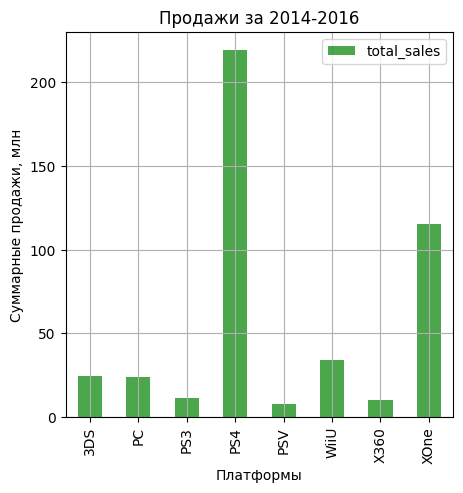

,total_sales
platform,
PS4,219.20
XOne,115.29
WiiU,33.83
3DS,24.21
PC,23.81


In [16]:
data2014_2016.pivot_table(index='platform', values='total_sales', aggfunc = 'sum').plot(grid=True, kind ='bar', color = 'green', alpha = 0.7, figsize=(5, 5))
plt.title('Продажи за 2014-2016')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи, млн')
plt.show()

good_year = data2014_2016.pivot_table(index='platform', values='total_sales', aggfunc = 'sum')
display(good_year.sort_values(by = 'total_sales', ascending=False).head(5))

<div class="alert alert-info">
Рассмотрим первые пять платформ: выручку, динамику продаж:   
    
</div>

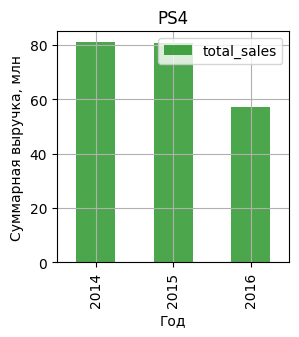

,total_sales
year_of_release,
2014,80.95
2015,80.90
2016,57.35


In [17]:
data2014_2016.query('platform == "PS4"').pivot_table(index='year_of_release', values='total_sales', aggfunc = 'sum').plot(grid=True, kind ='bar', color = 'green', alpha = 0.7, figsize=(3, 3))
plt.title('PS4')
plt.xlabel('Год')
plt.ylabel('Суммарная выручка, млн')
plt.show()

PS4_1416 = data2014_2016.query('platform == "PS4"').pivot_table(index='year_of_release', values='total_sales', aggfunc = 'sum')
display(PS4_1416)

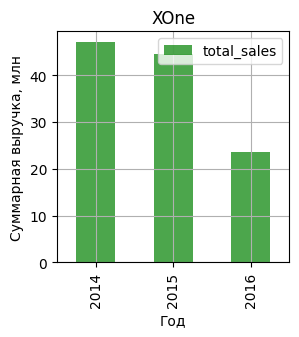

,total_sales
year_of_release,
2014,47.01
2015,44.58
2016,23.70


In [18]:
data2014_2016.query('platform == "XOne"').pivot_table(index='year_of_release', values='total_sales', aggfunc = 'sum').plot(grid=True, kind ='bar', color = 'green', alpha = 0.7, figsize=(3, 3))
plt.title('XOne')
plt.xlabel('Год')
plt.ylabel('Суммарная выручка, млн')
plt.show()

XOne_1416 = data2014_2016.query('platform == "XOne"').pivot_table(index='year_of_release', values='total_sales', aggfunc = 'sum')
display(XOne_1416)

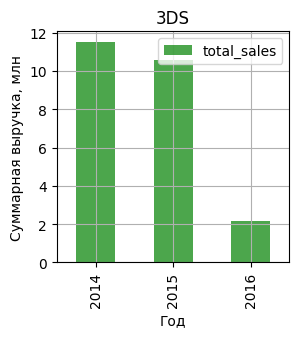

,total_sales
year_of_release,
2014,11.49
2015,10.55
2016,2.17


In [19]:
data2014_2016.query('platform == "3DS"').pivot_table(index='year_of_release', values='total_sales', aggfunc = 'sum').plot(grid=True, kind ='bar', color = 'green', alpha = 0.7, figsize=(3, 3))
plt.title('3DS')
plt.xlabel('Год')
plt.ylabel('Суммарная выручка, млн')
plt.show()
ZDS_1416 = data2014_2016.query('platform == "3DS"').pivot_table(index='year_of_release', values='total_sales', aggfunc = 'sum')
display(ZDS_1416)

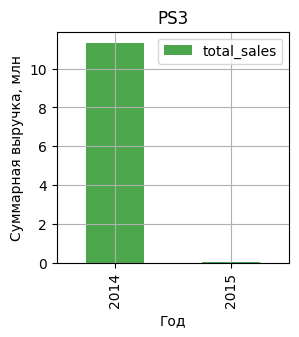

,total_sales
year_of_release,
2014,11.34
2015,0.02


In [20]:
data2014_2016.query('platform == "PS3"').pivot_table(index='year_of_release', values='total_sales', aggfunc = 'sum').plot(grid=True, kind ='bar', color = 'green', alpha = 0.7, figsize=(3, 3))
plt.title('PS3')
plt.xlabel('Год')
plt.ylabel('Суммарная выручка, млн')
plt.show()

PS3_1416 = data2014_2016.query('platform == "PS3"').pivot_table(index='year_of_release', values='total_sales', aggfunc = 'sum')
display(PS3_1416)

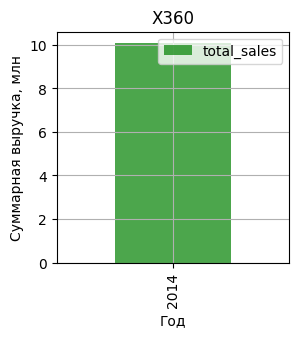

,total_sales
year_of_release,
2014,10.1


In [21]:
data2014_2016.query('platform == "X360"').pivot_table(index='year_of_release', values='total_sales', aggfunc = 'sum').plot(grid=True, kind ='bar', color = 'green', alpha = 0.7, figsize=(3, 3))
plt.title('X360')
plt.xlabel('Год')
plt.ylabel('Суммарная выручка, млн')
plt.show()

X360_1416 = data2014_2016.query('platform == "X360"').pivot_table(index='year_of_release', values='total_sales', aggfunc = 'sum')
display(X360_1416)

<div class="alert alert-info">
Учитывая, что данные за 2016г. неполные, потенциальный рост продаж есть у платформ PS4, XOne.
Три другие платформы -  спад с 2015г.    
</div>

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам:

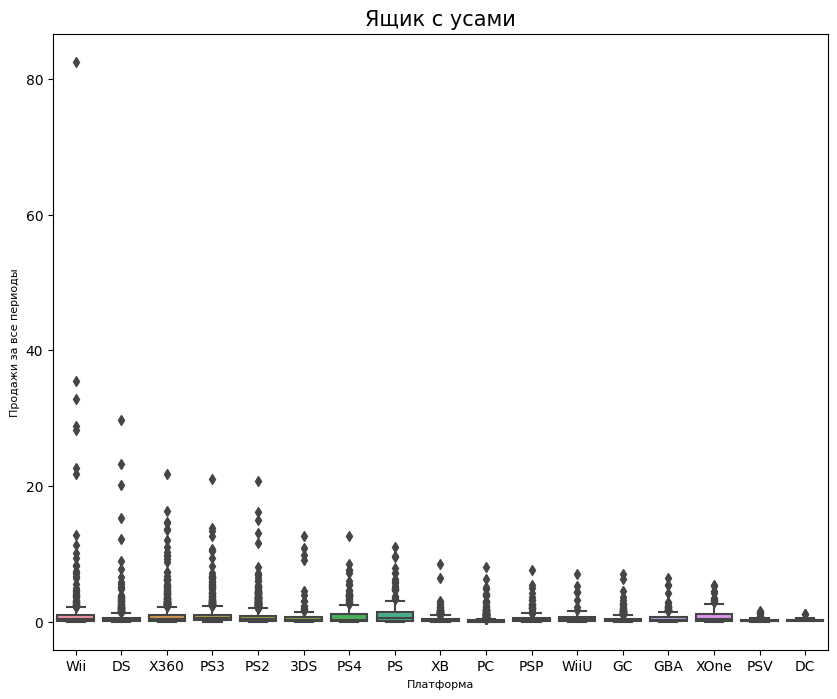

In [22]:
plt.figure(figsize=(10, 8))
sns.boxplot(data = data1, y= 'total_sales', x = 'platform')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=8)
plt.ylabel('Продажи за все периоды' ,fontsize=8)
plt.show()

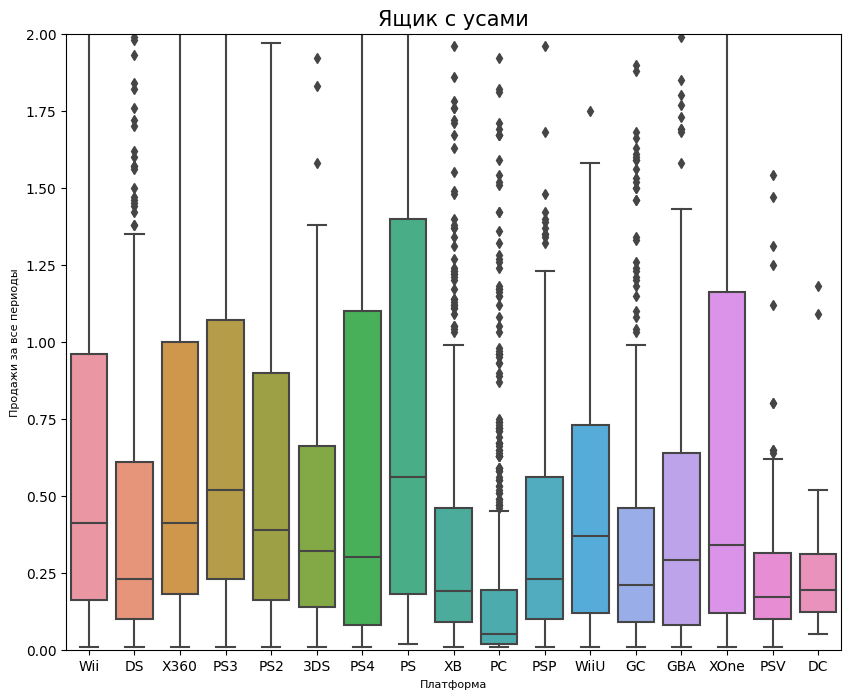

In [23]:
plt.figure(figsize=(10, 8))
sns.boxplot(data = data1, y= 'total_sales', x = 'platform')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=8)
plt.ylabel('Продажи за все периоды',fontsize=8)
plt.ylim(0, 2)
plt.show()



Теперь изучим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков:
    

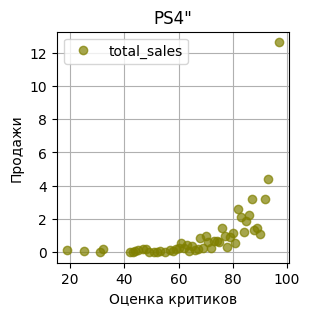

,critic_score,total_sales
critic_score,1.000000,0.401903
total_sales,0.401903,1.000000


In [24]:
data2014_2016.query('platform == "PS4"').pivot_table(index='critic_score', values='total_sales').plot(grid=True, style = 'o', alpha = 0.7, marker = 'o', c = 'olive', figsize=(3, 3))

PS4_goodss = data2014_2016.query('platform == "PS4"')
plt.title('PS4"')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()
display(PS4_goodss.pivot_table(index='name', values=['critic_score', 'total_sales']).corr())

<div class="alert alert-info">
Оценка критиков не сильно влияет на продажи.  Больше всего продаж при оценке 60-80 баллов.   
</div>

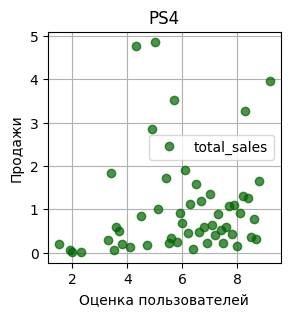

,total_sales,user_score
total_sales,1.000000,-0.588932
user_score,-0.588932,1.000000


In [25]:
PS4_goodss.pivot_table(index='user_score', values='total_sales').plot(grid=True, style = 'o', marker = 'o', alpha = 0.7, c = 'darkgreen', figsize=(3, 3))
plt.title('PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

display(PS4_goodss.pivot_table(index='genre', values=['user_score', 'total_sales']).corr())


<div class="alert alert-info">
Оценка пользователей не совсем объективна: многие отказались оценивать игру.
Но из тех, кто оценил можно сделать вывод, что оценка пользователей не особо влияет на продажи.
</div>

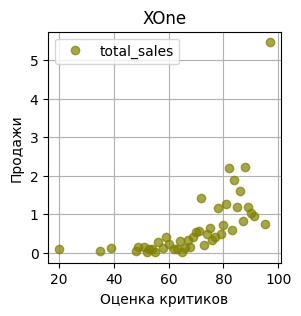

,critic_score,total_sales
critic_score,1.000000,0.422112
total_sales,0.422112,1.000000


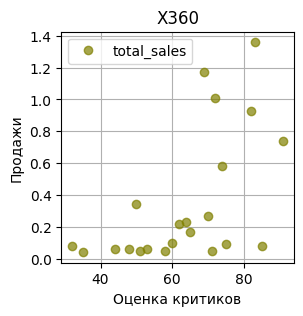

,critic_score,total_sales
critic_score,1.000000,0.525723
total_sales,0.525723,1.000000


In [26]:
data2014_2016.query('platform == "XOne"').pivot_table(index='critic_score', values='total_sales').plot(grid=True, style = 'o', alpha = 0.7, marker = 'o', c = 'olive', figsize=(3, 3))
XOne_goodss = data2014_2016.query('platform == "XOne"')
plt.title('XOne')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()
display(XOne_goodss.pivot_table(index='name', values=['critic_score', 'total_sales']).corr())

data2014_2016.query('platform == "X360"').pivot_table(index='critic_score', values='total_sales').plot(grid=True, style = 'o', alpha = 0.7, marker = 'o', c = 'olive', figsize=(3, 3))
X360_goodss = data2014_2016.query('platform == "X360"')
plt.title('X360')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()
display(X360_goodss.pivot_table(index='name', values=['critic_score', 'total_sales']).corr())

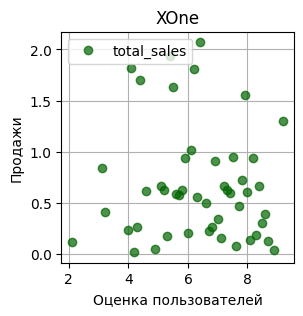

,total_sales,user_score
total_sales,1.000000,-0.091734
user_score,-0.091734,1.000000


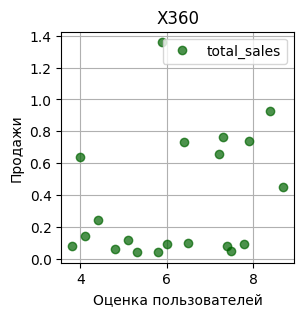

,total_sales,user_score
total_sales,1.000000,0.336514
user_score,0.336514,1.000000


In [27]:
data2014_2016.query('platform == "XOne"').pivot_table(index='user_score', values='total_sales').plot(grid=True, style = 'o', alpha = 0.7, marker = 'o', c = 'darkgreen', figsize=(3, 3))
XOne_goodss = data2014_2016.query('platform == "XOne"')
plt.title('XOne')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()
display(XOne_goodss.pivot_table(index='name', values=['user_score', 'total_sales']).corr())

data2014_2016.query('platform == "X360"').pivot_table(index='user_score', values='total_sales').plot(grid=True, style = 'o', alpha = 0.7, marker = 'o', c = 'darkgreen', figsize=(3, 3))
X360_goodss = data2014_2016.query('platform == "X360"')
plt.title('X360')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()
display(X360_goodss.pivot_table(index='name', values=['user_score', 'total_sales']).corr())

<div class="alert alert-info">
Так как потенциально прибыльных площадок всего три, посмотрела корреляцию по всем. Две остальные подтвреждают вывод по первой площадке:
    
1. оценка критиков мало влияет на продажи;
2. оценка пользователей не влияет на продажи.
</div>

Посмотрим на общее распределение игр по жанрам:

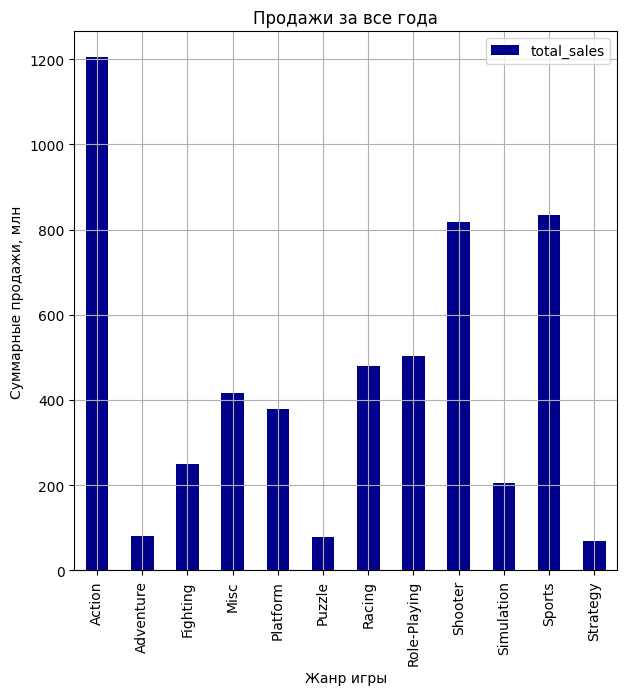

,sum,median
,total_sales,total_sales
genre,,
Action,1205.12,0.290
Adventure,81.41,0.130
Fighting,249.95,0.330
Misc,416.99,0.385
Platform,377.78,0.350
Puzzle,78.85,0.140
Racing,478.70,0.270
Role-Playing,502.33,0.260


In [28]:
data1.pivot_table(index='genre', values='total_sales', aggfunc = 'sum').plot(grid=True, kind = 'bar', color ='darkblue', figsize=(7, 7))
plt.title('Продажи за все года')
plt.xlabel('Жанр игры')
plt.ylabel('Суммарные продажи, млн')
plt.show()

good_genre = data1.pivot_table(index='genre', values='total_sales', aggfunc = ['sum', 'median'])
display(good_genre)

Данные показывают, что:

1. Прибыльные - Action, Racing, Role-Playing, Shooter, Sports.
2. У других жанров продажи меньше, несмотря на медианное значение.
   
    


Теперь возьмём топ-5 площадок, очистим их от вбросов, которые были видны на "Ящике с усами":

In [29]:
good_platform = ['PS4', 'XOne', '3DS', 'PS3', 'X360']
good_data = data2014_2016.query('platform == @good_platform and total_sales <10')

Определим для пользователя каждого региона (NA, EU, JP):


,sales,count,median
platform,,,
PS4,70.83,233,0.08
XOne,66.71,151,0.19
3DS,7.80,47,0.09
X360,5.63,26,0.07
PS3,4.14,36,0.05


'Продажи по платформам:'

155.10999999999999

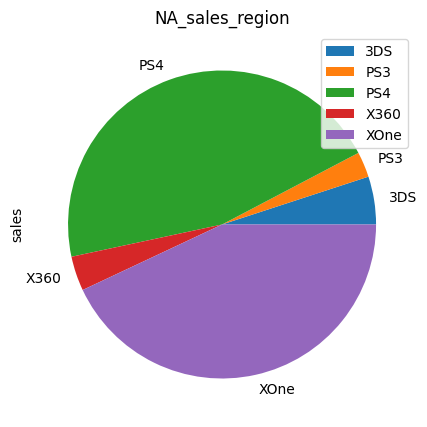

,sales,count,median
genre,,,
Shooter,47.48,66,0.385
Action,40.71,162,0.080
Sports,32.60,71,0.240
Role-Playing,15.64,59,0.080
Racing,4.15,34,0.045


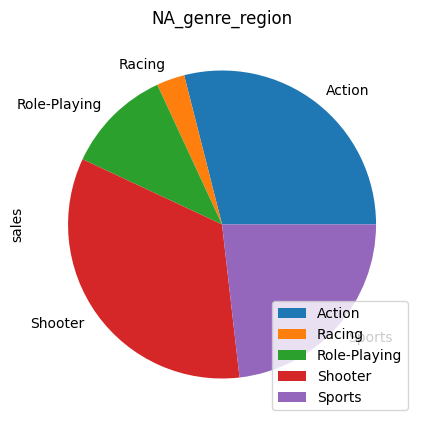

,sales,count,median
rating,,,
M,71.43,138,0.29
E,27.15,88,0.08
T,25.39,95,0.07
E10+,15.87,59,0.19
unknow,0.74,12,0.05


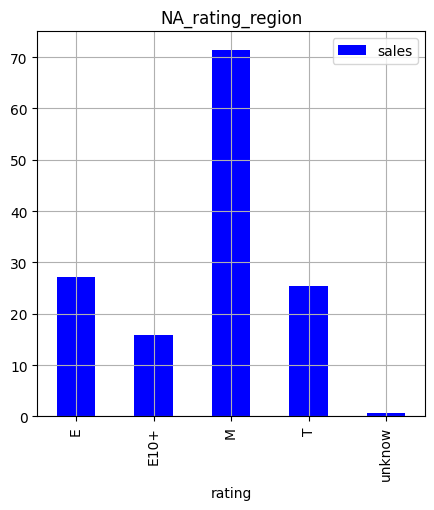

In [30]:
NA_sales_region = good_data.groupby('platform').agg(sales = ('na_sales', 'sum'), count = ('na_sales', 'count'), median = ('na_sales', 'median'))
display(NA_sales_region.sort_values(by = 'sales', ascending=False))
sum_na = NA_sales_region['sales'].sum()
display('Продажи по платформам:', sum_na)
NA_sales_region.pivot_table(index='platform', values='sales', aggfunc = 'sum').plot(grid=True, kind ='pie', figsize=(5, 5), subplots=True)
plt.title('NA_sales_region')
plt.show()

good_genre = ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']
good_genre_data = good_data.query('genre == @good_genre')
#display(good_genre_data.head(15))

NA_genre_region = good_genre_data.groupby('genre').agg(sales = ('na_sales', 'sum'), count = ('na_sales', 'count'), median = ('na_sales', 'median'))
display(NA_genre_region.sort_values(by = 'sales', ascending=False))
NA_genre_region.pivot_table(index='genre', values='sales', aggfunc = 'sum').plot(grid=True, kind ='pie', figsize=(5, 5), subplots=True)
plt.title('NA_genre_region')
plt.show()

NA_rating_region = good_genre_data.groupby('rating').agg(sales = ('na_sales', 'sum'), count = ('na_sales', 'count'), median = ('na_sales', 'median'))
display(NA_rating_region.sort_values(by = 'sales', ascending=False))
NA_rating_region.pivot_table(index='rating', values='sales', aggfunc = 'sum').plot(grid=True, kind ='bar', color ='blue', figsize=(5, 5), subplots=True)
plt.title('NA_rating_region')
plt.show()




 **NA, Северная Америка.**
1. **Платформа:** предопочитают платформы ХOne и PS4.
2. **Жанр:** любят стрелялки и игры про "супергероев"(экшн). Спортивные игры на третьем месте.
3. **Категория:** лучше всего продаются игры для взрослой публики категории М.
    


,sales,count,median
platform,,,
3DS,9.94,47,0.08
PS4,8.11,233,0.01
PS3,1.77,36,0.02
XOne,0.27,151,0.00
X360,0.04,26,0.00


'Продажи по платформам:'

20.13

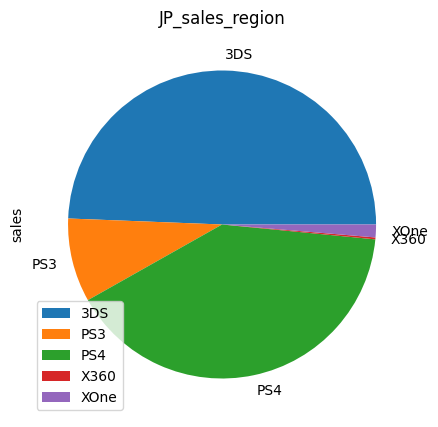

,sales,count,median
genre,,,
Role-Playing,6.89,59,0.03
Action,4.98,162,0.00
Shooter,2.12,66,0.00
Sports,0.90,71,0.00
Racing,0.21,34,0.00


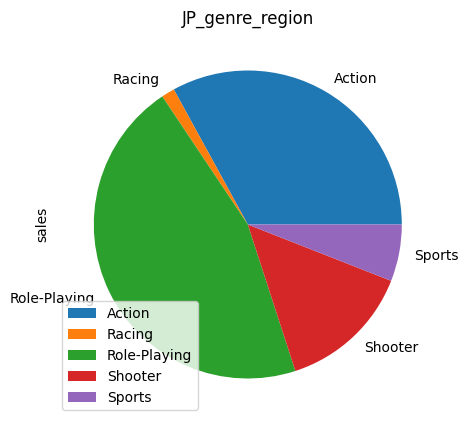

,sales,count,median
rating,,,
T,6.03,95,0.01
M,5.29,138,0.00
E,2.01,88,0.00
E10+,1.64,59,0.00
unknow,0.13,12,0.00


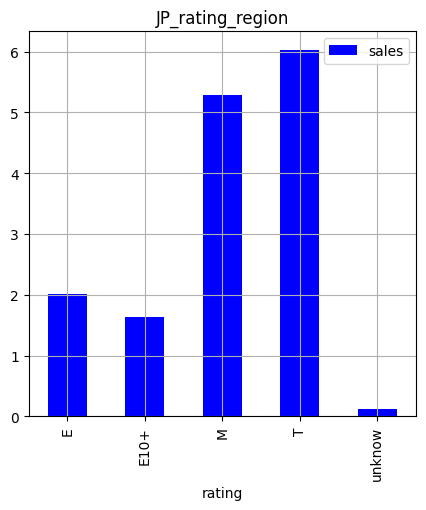

In [31]:
JP_sales_region = good_data.groupby('platform').agg(sales = ('jp_sales', 'sum'), count = ('jp_sales', 'count'), median = ('jp_sales', 'median'))
display(JP_sales_region.sort_values(by = 'sales', ascending=False))
sum_jp = JP_sales_region['sales'].sum()
display('Продажи по платформам:', sum_jp)
JP_sales_region.pivot_table(index='platform', values='sales', aggfunc = 'sum').plot(grid=True, kind ='pie', figsize=(5, 5), subplots=True)
plt.title('JP_sales_region')
plt.show()

JP_genre_region = good_genre_data.groupby('genre').agg(sales = ('jp_sales', 'sum'), count = ('jp_sales', 'count'), median = ('jp_sales', 'median'))
display(JP_genre_region.sort_values(by = 'sales', ascending=False))
JP_genre_region.pivot_table(index='genre', values='sales', aggfunc = 'sum').plot(grid=True, kind ='pie', figsize=(5, 5), subplots=True)
plt.title('JP_genre_region')
plt.show()

JP_rating_region = good_genre_data.groupby('rating').agg(sales = ('jp_sales', 'sum'), count = ('jp_sales', 'count'), median = ('jp_sales', 'median'))
display(JP_rating_region.sort_values(by = 'sales', ascending=False))
JP_rating_region.pivot_table(index='rating', values='sales', aggfunc = 'sum').plot(grid=True, kind ='bar', color ='blue', figsize=(5, 5), subplots=True)
plt.title('JP_rating_region')
plt.show()



**JP, Япония.**
1. **Платформа:** предопочитают платформы 3DS и PS4.
2. **Жанр:** любят  игры про "супергероев"(экшн) и ролевые.
3. **Категория:** для подростков, Т. На втором месте продаж игры для взрослых  М.
    


'Продажи по платформам:'

146.03

,sales,count,median
platform,,,
PS4,95.38,233,0.110
XOne,38.03,151,0.100
3DS,5.25,47,0.040
PS3,3.84,36,0.030
X360,3.53,26,0.055


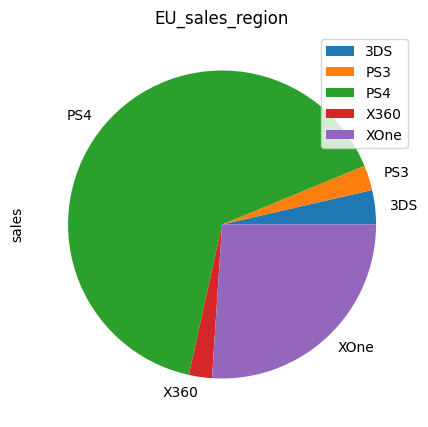

,sales,count,median
genre,,,
Action,40.66,162,0.070
Shooter,38.47,66,0.330
Sports,32.52,71,0.130
Role-Playing,13.24,59,0.040
Racing,8.28,34,0.095


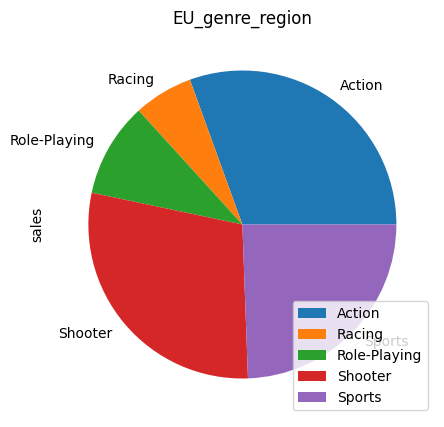

,sales,count,median
rating,,,
M,66.08,138,0.240
E,34.51,88,0.090
T,21.53,95,0.050
E10+,10.40,59,0.130
unknow,0.65,12,0.025


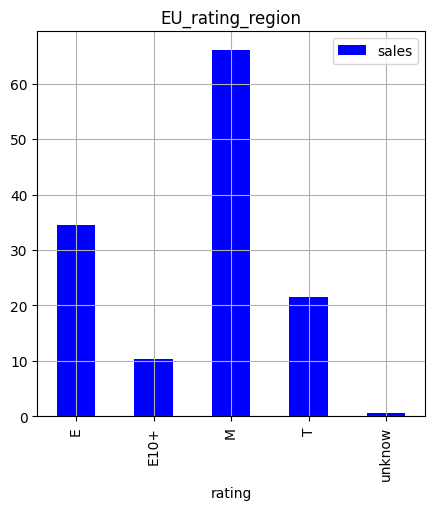

In [32]:
EU_sales_region = good_data.groupby('platform').agg(sales = ('eu_sales', 'sum'), count = ('eu_sales', 'count'), median = ('eu_sales', 'median'))
sum_eu = EU_sales_region['sales'].sum()
display('Продажи по платформам:', sum_eu)
display(EU_sales_region.sort_values(by = 'sales', ascending=False))
EU_sales_region.pivot_table(index='platform', values='sales', aggfunc = 'sum').plot(grid=True, kind ='pie', figsize=(5, 5), subplots=True)
plt.title('EU_sales_region')
plt.show()

EU_genre_region = good_genre_data.groupby('genre').agg(sales = ('eu_sales', 'sum'), count = ('eu_sales', 'count'), median = ('eu_sales', 'median'))
display(EU_genre_region.sort_values(by = 'sales', ascending=False))
EU_genre_region.pivot_table(index='genre', values='sales', aggfunc = 'sum').plot(grid=True, kind ='pie', figsize=(5, 5), subplots=True)
plt.title('EU_genre_region')
plt.show()

EU_rating_region = good_genre_data.groupby('rating').agg(sales = ('eu_sales', 'sum'), count = ('eu_sales', 'count'), median = ('eu_sales', 'median'))
display(EU_rating_region.sort_values(by = 'sales', ascending=False))
EU_rating_region.pivot_table(index='rating', values='sales', aggfunc = 'sum').plot(grid=True, kind ='bar', color ='blue', figsize=(5, 5), subplots=True)
plt.title('EU_rating_region')
plt.show()



 **EU, Европа.**
1. **Платформа:** предопочитают платформу и PS4.
2. **Жанр:** любят  игры про "супергероев"(экшн) и стпрелялки. На втором месте спортивные игры.
3. **Категория:** лучше всего продаются игры для взрослой публики категории М.


'Продажи по платформам:'

46.269999999999996

,sales,count,median
platform,,,
PS4,32.26,233,0.040
XOne,10.28,151,0.030
PS3,1.61,36,0.020
3DS,1.22,47,0.010
X360,0.90,26,0.015


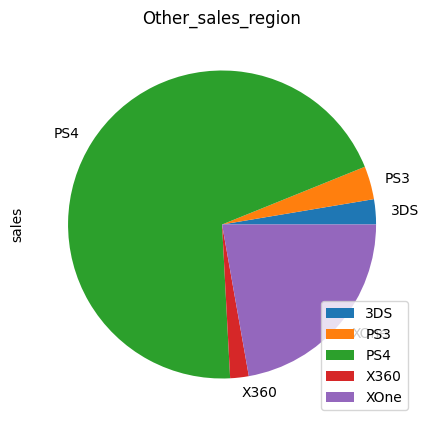

,sales,count,median
genre,,,
Shooter,12.81,66,0.105
Action,12.77,162,0.020
Sports,10.50,71,0.050
Role-Playing,4.39,59,0.020
Racing,1.70,34,0.020


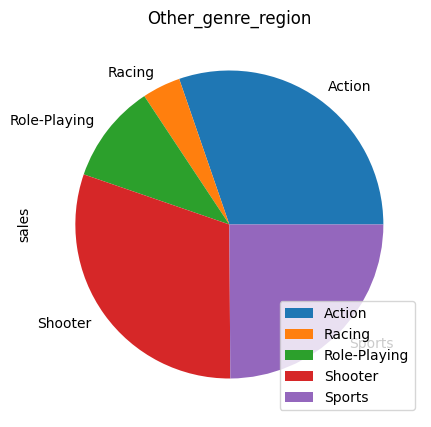

,sales,count,median
rating,,,
M,20.96,138,0.06
E,9.51,88,0.03
T,7.70,95,0.02
E10+,3.80,59,0.04
unknow,0.20,12,0.01


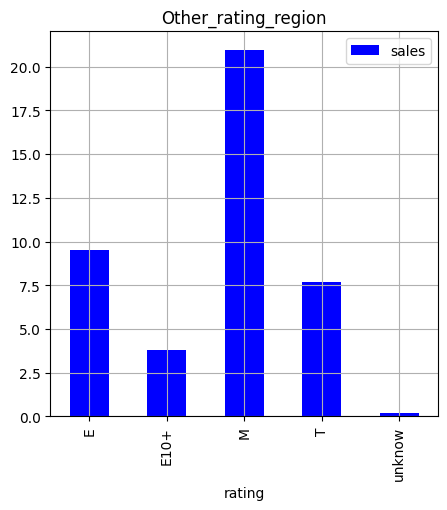

In [33]:
Other_sales_region = good_data.groupby('platform').agg(sales = ('other_sales', 'sum'), count = ('other_sales', 'count'), median = ('other_sales', 'median'))
sum_ot = Other_sales_region['sales'].sum()
display('Продажи по платформам:', sum_ot)
display(Other_sales_region.sort_values(by = 'sales', ascending=False))
Other_sales_region.pivot_table(index='platform', values='sales', aggfunc = 'sum').plot(grid=True, kind ='pie', figsize=(5, 5), subplots=True)
plt.title('Other_sales_region')
plt.show()

Other_genre_region = good_genre_data.groupby('genre').agg(sales = ('other_sales', 'sum'), count = ('other_sales', 'count'), median = ('other_sales', 'median'))
display(Other_genre_region.sort_values(by = 'sales', ascending=False))
Other_genre_region.pivot_table(index='genre', values='sales', aggfunc = 'sum').plot(grid=True, kind ='pie', figsize=(5, 5), subplots=True)
plt.title('Other_genre_region')
plt.show()

Other_rating_region = good_genre_data.groupby('rating').agg(sales = ('other_sales', 'sum'), count = ('other_sales', 'count'), median = ('other_sales', 'median'))
display(Other_rating_region.sort_values(by = 'sales', ascending=False))
Other_rating_region.pivot_table(index='rating', values='sales', aggfunc = 'sum').plot(grid=True, kind ='bar', color ='blue', figsize=(5, 5), subplots=True)
plt.title('Other_rating_region')
plt.show()


**Other, другие регионы.**
1. **Платформа:** предопочитают платформу PS4.
2. **Жанр:** любят  игры про "супергероев"(экшн)и стрелялки. На втором месте спортивные игры.
3. **Категория:** лучше всего продаются игры для взрослой публики категории М.
   


### Проверка гипотез



**Гипотеза 1:**
1. **H_0:**
Средние пользовательские рейтинги платформы Xbox One = Средние пользовательские рейтинги платформы PС.

2. **H_a:**
Средние пользовательские рейтинги платформы Xbox One ≠ Средние пользовательские рейтинги платформы PС.

3. *alpha = 0.05*
    
4. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    

In [34]:
xbox_one = good_data[good_data['platform']=='XOne']['user_score']
PC = good_data[good_data['platform']=='PC']['user_score']
results = st.ttest_ind(xbox_one, PC, equal_var = False)

alpha = .05

print(results.pvalue)
if results.pvalue<alpha:
    print('Пользовательские рейтинги Xbox One и PС различны.')
else:
    print('Пользовательские рейтинги Xbox One и PС схожи.')

nan
Пользовательские рейтинги Xbox One и PС схожи.




 **Гипотеза 2:**
1. **H_0:**
Средние пользовательские рейтинги жанра Action = Средние пользовательские рейтинги жанра Sports.

2. **H_a:**
Средние пользовательские рейтинги жанра Action ≠ Средние пользовательские рейтинги жанра Sports.

3. *alpha = 0.05*

4. Средние пользовательские рейтинги жанров Action и Sports разные.
  

In [35]:
Action = good_data[good_data['genre']=='Action']['user_score']
Sports = good_data[good_data['genre']=='Sports']['user_score']
results = st.ttest_ind(Action, Sports, equal_var = False)

alpha = .05

print(results.pvalue)
if results.pvalue<alpha:
    print('Пользовательские рейтинги жанра Action и Sports схожи.')
else:
    print('Пользовательские рейтинги жанра Action и Sports различны.')

1.3413201664192661e-06
Пользовательские рейтинги жанра Action и Sports схожи.


    
**Как сформулировали нулевую и альтернативную гипотезы:**
За Н_0 взято условие, за Н_а - несоответствие ему.


**Какой критерий применили для проверки гипотез и почему.**
Гипотезу о равенстве средних двух ген.совокупностей.
Есть один датасет, в котором находятся две выборки для сравнения. Так как продажи на разных платформах и разных жанров различаются - одни определенно больше других,- то добавляю *equal_var = False*.

### Выводы исследования

  
1. Самые популярные платформы PS4 – 1 место, XOne – 2 место. По регионам Северная Америка, Евпропа, другие страны.
2. Самые популярные жанры Action, Shooter, Sports. По регионам Северная Америка, Евпропа, другие страны.
3. Категория М имеет большой спрос. Игры категории для взрослых лидируют в продажах. Вторые по рейтингу продаж игры для любого возраста, третьи - для подростков.
4. Больше всего играют в Северной Америке и Европе. Продажи игр превышают в четыре раза Японию и другие регионы.
5. Пользователи в Японии отличаются предпочтениями в играх и площадках: они предпочитают Role-Playing, Action и выбирают 3DC, на втором месте PS4.Также отличается категория игр – для подростков.
6. Пользователи и критики всех регионов не любят давать оценку играм. Более 40% либо пропускают параметр либо указывают что не определились.
7. Оценка критиков и пользователей не значительно влияют на продажи игр.
8. Пользовательские рейтинги Xbox One и PС схожи. Однако, Xbox One продается лучше. Возможно, дело в доступности покупки РС, раскрученности площадки.
9. Пользовательские рейтинги жанра Action и Sports различны. Людям больше нравится примерять на себя новые роли нежели заниматься виртуальным спортом.